<a href="https://colab.research.google.com/github/avinashkr1612/ML-image-Detection/blob/master/ML_Product_Detection_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
import zipfile

local_zip = '/tmp/horlicks-colgate.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/horlicks-colgate')
zip_ref.close()

In [0]:
# Directory with our training horse pictures
train_horlicks_dir = os.path.join('/tmp/horlicks-colgate/horlicks')

# Directory with our training human pictures
train_toothpaste_dir = os.path.join('/tmp/horlicks-colgate/toothpaste')

In [71]:
train_horlicks_names = os.listdir(train_horlicks_dir)
print(train_horlicks_names[:5])

train_toothpaste_names = os.listdir(train_toothpaste_dir)
print(train_toothpaste_names[:5])

['images (2).jpg', '61gSCLEqmQL._SY355_ - Copy.jpg', '61Xq-obT8AL._SL1000_.jpg', 'images (1).jpg', '61gSCLEqmQL._SY355_.jpg']
['download.png', 'asdf.jpg', 'asdgasdfadsf.jpg', 'afsd.png', 'download.jpg']


In [72]:
print('total training horse images:', len(os.listdir(train_horlicks_dir)))
print('total training human images:', len(os.listdir(train_toothpaste_dir)))

total training horse images: 6
total training human images: 5


In [0]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

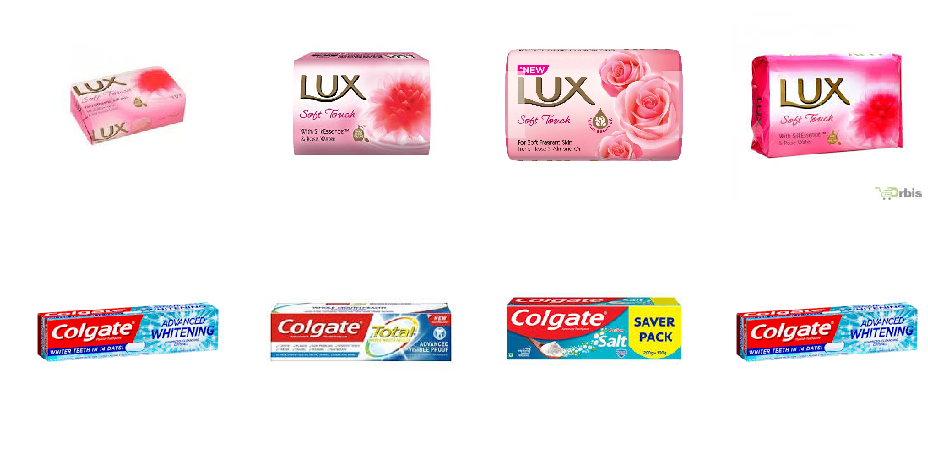

In [74]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 4
next_horlicks_pix = [os.path.join(train_horlicks_dir, fname) 
                for fname in train_horlicks_names[pic_index-4:pic_index]]
next_toothpaste_pix = [os.path.join(train_toothpaste_dir, fname) 
                for fname in train_toothpaste_names[pic_index-4:pic_index]]

for i, img_path in enumerate(next_horlicks_pix+next_toothpaste_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


In [0]:
import tensorflow as tf

In [0]:
model = tf.keras.models.Sequential([
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [77]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 33, 33, 64)       

In [0]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

In [79]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/tmp/horlicks-colgate/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=4,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')


Found 11 images belonging to 2 classes.


In [80]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=8,  
      epochs=15,
      verbose=1)

Epoch 1/15
8/8 [==============================] - 4s 485ms/step - loss: 0.8622 - acc: 0.4828
Epoch 2/15
8/8 [==============================] - 3s 371ms/step - loss: 0.6664 - acc: 0.8333
Epoch 3/15
8/8 [==============================] - 3s 363ms/step - loss: 0.0149 - acc: 1.0000
Epoch 4/15
8/8 [==============================] - 3s 367ms/step - loss: 0.0011 - acc: 1.0000
Epoch 5/15
8/8 [==============================] - 3s 366ms/step - loss: 2.4588e-04 - acc: 1.0000
Epoch 6/15
8/8 [==============================] - 3s 361ms/step - loss: 1.1846e-04 - acc: 1.0000
Epoch 7/15
8/8 [==============================] - 3s 356ms/step - loss: 4.0757e-05 - acc: 1.0000
Epoch 8/15
8/8 [==============================] - 3s 360ms/step - loss: 2.6138e-05 - acc: 1.0000
Epoch 9/15
8/8 [==============================] - 3s 364ms/step - loss: 7.0855e-06 - acc: 1.0000
Epoch 10/15
8/8 [==============================] - 3s 355ms/step - loss: 4.2027e-06 - acc: 1.0000
Epoch 11/15
8/8 [============================

## **Verification of Model**

In [81]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a Colgate and product id is  2345")
  else :
      print(fn + " is a horlicks and product id is  7654")
 
 

Saving download.jpg to download.jpg
[1.]
download.jpg is a Colgate and product id is  2345
